# 📌 Regression Metrics (Evaluation Metrics)
### MAE, MSE, RMSE, R² Score & Adjusted R2 Score

Regression models predict continuous values (example: house price, salary, temperature).  
To evaluate how good the model is, we use **regression metrics**.

---

## ✅ Notations (Symbols used)

- \( y_i \)  → actual (true) value  
- \( \hat{y}_i \) → predicted value  
- \( n \) → number of observations (rows)  
- \( p \) → number of features (independent variables)  
- \( \bar{y} \) → mean of actual values  

Residual / error:
$$
e_i = y_i - \hat{y}_i
$$

---

# 1) MAE — Mean Absolute Error

### 📌 Formula
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}\left|y_i - \hat{y}_i\right|
$$

### 🔍 Meaning
- Average of absolute errors (distance between actual and predicted)

### ✅ Advantages
- Easy to understand
- Not highly affected by outliers

### ❌ Disadvantages
- Does not penalize large errors strongly

### 📌 Best use case
- When dataset has outliers and you want a stable metric

---

# 2) MSE — Mean Squared Error

### 📌 Formula
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2
$$

### 🔍 Meaning
- Squares the error values → large mistakes get heavily penalized

### ✅ Advantages
- Strongly penalizes large mistakes
- Differentiable → used as a **loss function** in training

### ❌ Disadvantages
- Very sensitive to outliers
- Unit becomes squared (harder to interpret)

### 📌 Best use case
- When large errors are very costly (example: medical, finance)

---

# 3) RMSE — Root Mean Squared Error

### 📌 Formula
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2}
$$

### 🔍 Meaning
- Square root of MSE
- Returns error in the same unit as target variable

### ✅ Advantages
- Interpretable (same unit as output)
- Penalizes large errors

### ❌ Disadvantages
- Sensitive to outliers (because it depends on squared error)

### 📌 Best use case
- Most common metric for regression tasks

---

# 4) R2 Score — Coefficient of Determination

### 📌 Formula
$$
R2 = 1 - \frac{\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2}{\sum_{i=1}^{n}\left(y_i - \bar{y}\right)^2}
$$

### 🔍 Meaning
- Shows how much variance in \(y\) is explained by the model

### 📌 Range interpretation
- \(R^2 = 1\) → perfect prediction  
- \(R^2 = 0\) → model predicts same as mean  
- \(R^2 < 0\) → model is worse than predicting mean  

### ✅ Advantages
- Easy comparison between models
- Unitless (scale independent)

### ❌ Disadvantages
- Can increase even if you add useless features

### 📌 Best use case
- Comparing models for the same dataset

---

# 5) Adjusted R² Score

### 📌 Formula
$$
Adjusted\ R2 = 1 - (1 - R2)\left(\frac{n - 1}{n - p - 1}\right)
$$

### 🔍 Meaning
- Improved version of R2
- Penalizes adding unnecessary features

### ✅ Advantages
- Useful when comparing models with different number of features
- Helps detect overfitting

### ❌ Disadvantages
- Not very meaningful for very small datasets

### 📌 Best use case
- Multiple linear regression (many features)

---

# 📌 Quick Comparison Table

| Metric | What it measures | Outlier sensitivity | Unit |
|--------|------------------|-------------------|------|
| MAE | Average absolute error | Low | Same as target |
| MSE | Average squared error | High | Squared unit |
| RMSE | Root of MSE | High | Same as target |
| R² | Variance explained | Indirect | Unitless |
| Adjusted R² | R² with penalty | Indirect | Unitless |

---

# 🧠 Which metric should you choose?

✅ Want robust & simple → **MAE**  
✅ Want to punish big errors → **MSE / RMSE**  
✅ Want best interpretability + common usage → **RMSE**  
✅ Want variance explanation → **R²**  
✅ Many features → **Adjusted R²**

---



In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('placement3.csv')

In [42]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [43]:
df.shape

(200, 2)

Text(0, 0.5, 'Package in lpa')

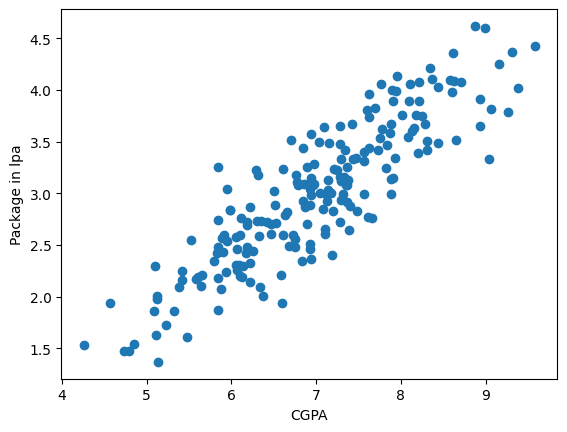

In [44]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in lpa')

In [45]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Package(in lpa)')

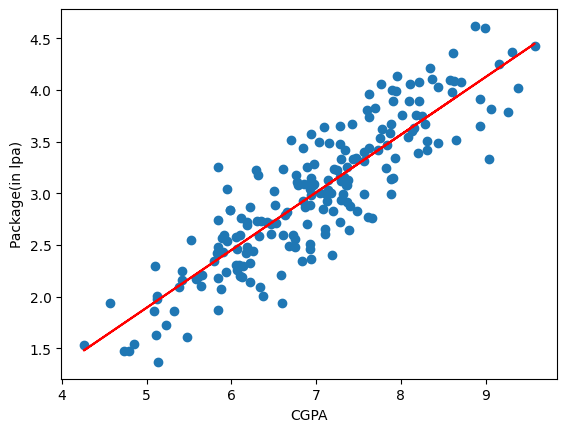

In [50]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')


In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [52]:
y_pred = lr.predict(x_test)

In [53]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [54]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [55]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [56]:
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred)))

RMSE 0.5370950504220063


In [57]:
print('MSE',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [58]:
# Adjusted R2 Score

x_test.shape

(40, 1)

In [59]:
1 - ((1-r2) * (40-1)/(40-1-1))

0.7749598882343415

In [60]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.650521,3.26
1,5.12,0.062843,1.98
2,7.82,0.501356,3.25
3,7.42,0.572989,3.67
4,6.94,0.447275,3.57


Text(0, 0.5, 'Package in Lpa')

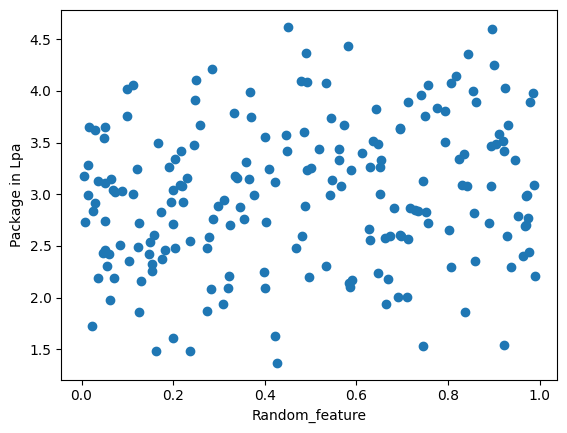

In [61]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('Random_feature')
plt.ylabel('Package in Lpa')

In [62]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 1) train (fit)
lr.fit(x_train, y_train)

# 2) predict
y_pred = lr.predict(x_test)


In [68]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)


R2 score 0.7776781509896032


In [69]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.765660753745798

In [70]:

new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [72]:
new_df2.sample(5)


,cgpa,iq,package
19,7.48,3.63,2.83
125,7.33,3.46,3.16
29,7.15,4.19,3.49
87,8.09,2.35,3.55
98,7.69,3.33,3.83


Text(0, 0.5, 'Package(in lpa)')

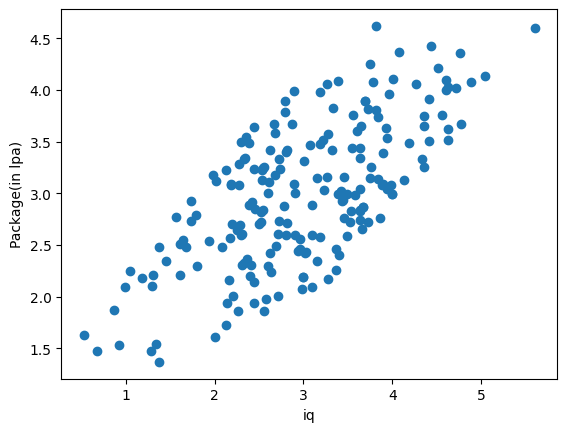

In [73]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [74]:
np.random.randint(-100,100)


-48

In [75]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]


In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [78]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)


R2 score 0.8136265971973399


In [79]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.8035523592080069